In [1]:
######import packages ###########################
#################################################
from astropy.io import fits

import matplotlib
import matplotlib.pyplot as plt


import pyfits
from astropy.io import fits
import astropy.io.ascii as ascii 
import os
import numpy as np
from astropy import units as u
from astropy.utils import data
#import pandas as pd
import matplotlib.gridspec as gridspec
import aplpy

from spectral_cube import SpectralCube
import warnings
warnings.filterwarnings('ignore')

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

matplotlib.rcParams['axes.linewidth']=2
matplotlib.rcParams['lines.linewidth']=2
plt.rcParams['axes.linewidth'] = 2.

/home/mitra/anaconda3/lib/python3.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [2]:
###############################################################
## Adams pvextractor (function format)
###############################################################

def sample_points_edges(x,y,spacing):

    #x, y = zip(x,y)
    global d_sampled , x_sampled, y_sampled
    # Find the distance interval between all pairs of points
    dx = np.diff(x)
    dy = np.diff(y)
    dd = np.hypot(dx, dy)

    # Find the total displacement along the broken curve
    d = np.hstack([0., np.cumsum(dd)])

    # Figure out the number of points to sample, and stop short of the
    # last point.
    n_points = np.floor(d[-1] / spacing)

    if n_points == 0:
        raise ValueError("Path is shorter than spacing")

    d_sampled = np.linspace(0, n_points * spacing, n_points + 1)

    
    x_sampled = np.interp(d_sampled, d, x)

  

    y_sampled = np.interp(d_sampled, d, y)

    return d_sampled, x_sampled, y_sampled


def sample_points():

    global x_sampled, y_sampled
    
    x_sampled = 0.5 * (x_sampled[:-1] + x_sampled[1:])
    y_sampled = 0.5 * (y_sampled[:-1] + y_sampled[1:])

    return x_sampled, y_sampled
######################################################
def q(x, A, B): # this is your 'straight line' y=f(x)
   return A*x + B

def line(x): # when you optimized your line , you need to use this function to drow your line

    return popt[0]*x+popt[1]
######################################################

(101, 1280, 1280)
n is :47
n is :34
n is :51
n is :82
n is :33
n is :19


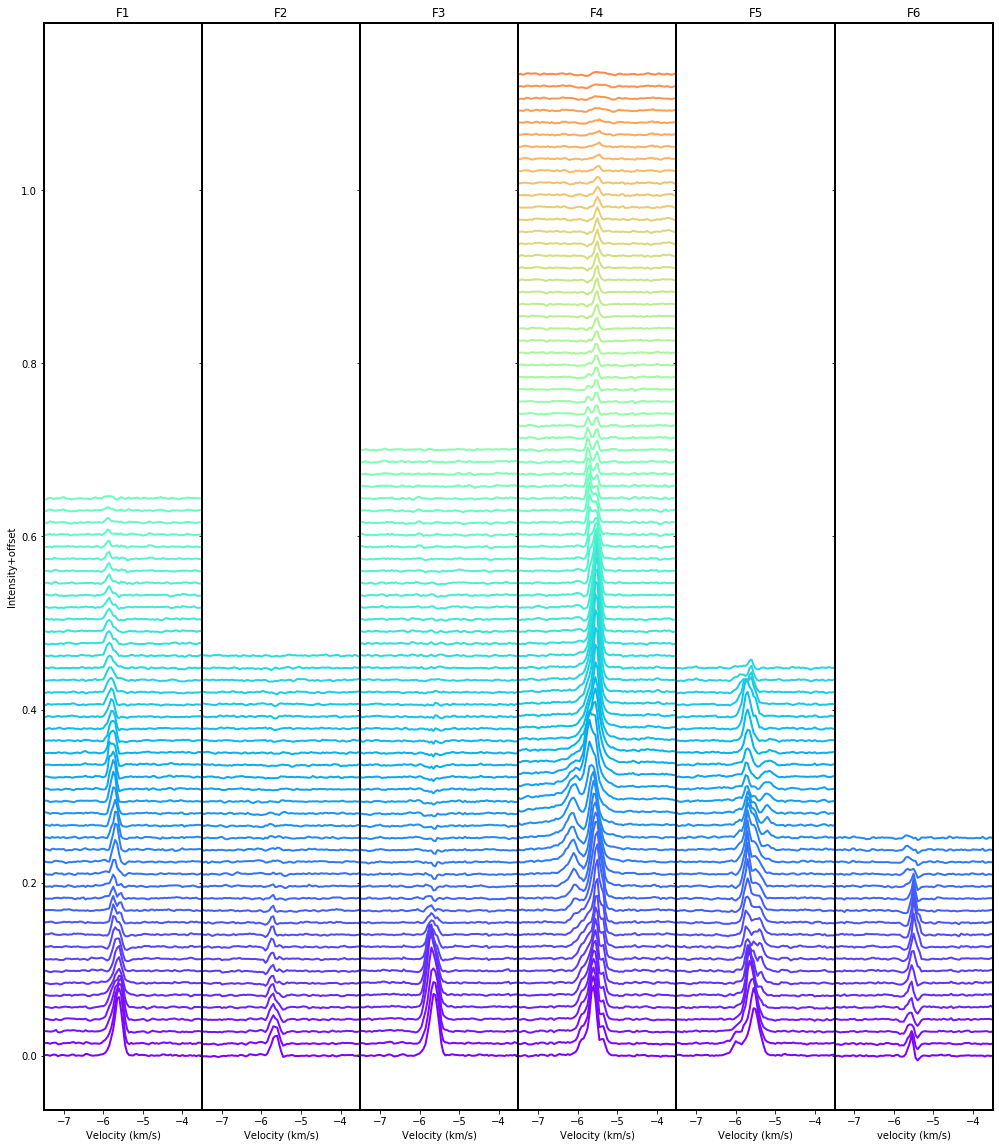

In [7]:

######read cube and filament line################
############-####################################
fitfile = '../../../data/alma_data/spw7_h13co+/H13COp_100chans_vel.fits'

data, header = fits.getdata( fitfile, header=True) 
Listvel= []
bmin = header['BMIN'] * u.arcsec
bmaj = header['BMAJ'] *u.arcsec
velStep = header['CDELT3']
velStart = header ['CRVAL3']
velRange = header['NAXIS3']

cube = SpectralCube.read(fitfile)
print(cube.shape)

l= 0

while l < velRange:
    vel_l = (velStart + (velStep * l))/10000
    Listvel.append(vel_l)
    l+=1


filid=['1' , '2', '3', '4', '5', '6']#, '9' ,'10', '13', '14','15', '17', '19']
fig, axs = plt.subplots(1,len(filid), sharex=True, sharey=True, gridspec_kw={'wspace': 0}, figsize=(17,20))

for ii in range(len(filid)):
    #print('Listvel=', Listvel)
    #print ('ii=', ii)
    datafile = open('/home/mitra/Documents/projects/ngc6334/filaments/New_filament_2022/txt_regions/filament_' + filid[ii] + '.txt')
    data1 = datafile.readlines()
    data2 =[]
    for j in range (0, len(data1), 3):
        data2.append(list(map(float, data1[j].split())))
    #print(data2)
    n = len(data2)
    colors = plt.cm.rainbow(np.linspace(0,1,100))
    print('n is :%d'%n)
    #fig = plt.figure(figsize=(4,6))
    #ax = fig.add_subplot(111)	
    m = 0
    for k in range(n):# enumerate(data2):
        x = int(data2[k][0])
        y = int(data2[k][1])
        subcube = cube[:, x-20:x+20, y-20:y+20]
        spectrum = subcube.mean(axis=(1,2)) 
        Listspec= spectrum + k * 0.014 * u.Jy / u.beam
        if m<n:
            axs[ii].plot(Listvel, Listspec, color=colors[m])
            axs[ii].set_title('F'+filid[ii])
            axs[ii].set_xlim([-7.5, -3.5])
            axs[ii].set_xlabel('Velocity (km/s)')
            axs[ii].set_ylabel('Intensity+offset')
            
            m+=1
            #plt.hold(True)


    for ax in axs:
        ax.label_outer()
        #plt.hold(True)
#'veluency (GHz)')
#plt.ylabel('Intensity+offset')
plt.xlabel('velocity (km/s)')
    #plt.savefig('plots/data%d.pdf'%ii)
    #fig.suptitle('[$H42 \\alpha$] core spectrum ')


plt.savefig('plots/pv_SUBplot1.pdf', bbox_inches='tight', dpi=300)

plt.show()